<a href="https://colab.research.google.com/github/EloiMolla/SSN/blob/main/Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Eloi Mollà

---
**Homework 4 - Càlculs fent servir el mètode de Monte Carlo**

*Càlcul del volum d'una esfera i càlcul d'integració d'una funció*

Simulació de Sistemes Nanomèrics - Març 2025



---










In [213]:
#importem llibreries
import numpy as np
import matplotlib.pyplot as plt

In [214]:
#numero total de punts alatoris
total_random_points = int(input("\nEnter number of points for Monte Carlo estimate sphere's volume?\n>"))


Enter number of points for Monte Carlo estimate sphere's volume?
>100


In [215]:
#punt d'inici per contar els punts dins l'esfra i dins el cub
inside_sphere = 0
inside_cube = 0

In [216]:
#llistes de punts dins l'esfera i dins del cub però fora l'esfera
#dins espera (sphere)
xs = []
ys = []
zs = []

#dins cub
xc = []
yc = []
zc = []

In [217]:
#càlcul
while (inside_sphere<total_random_points):
  #generar punt
  x = np.random.uniform(-1.0, 1.0)
  y = np.random.uniform(-1.0, 1.0)
  z = np.random.uniform(-1.0, 1.0)

  #punts dins cub
  inside_cube = inside_cube + 1

  #mirem si estan dins de l'esfera
  if x**2 + y**2 + z**2 <= 1:
    inside_sphere = inside_sphere + 1
    xs.append(x)
    ys.append(y)
    zs.append(z)
  else:
    xc.append(x)
    yc.append(y)
    zc.append(z)


In [218]:
sphere_ratio = inside_sphere / inside_cube
#volum del cub es 8
volume_approx = 8 * sphere_ratio

In [219]:
# Print output
print('\n--------------')
print('\nResult')
print('\nNumber of points inside cube of volume 8:', inside_cube)
print('Number of points inside unit sphere:',inside_sphere,)
print('Ratio unit sphere/full cube=',sphere_ratio*100,'%')
print('\nEstimated volume of unit sphere =',sphere_ratio,'x Total Volume =', volume_approx)
print(' Exact value (Volume sphere):', 4/3 * np.pi)


--------------

Result

Number of points inside cube of volume 8: 202
Number of points inside unit sphere: 100
Ratio unit sphere/full cube= 49.504950495049506 %

Estimated volume of unit sphere = 0.49504950495049505 x Total Volume = 3.9603960396039604
 Exact value (Volume sphere): 4.1887902047863905


In [220]:
#numero total de punts alatoris
total_random_points_function = int(input("\nEnter number of points for Monte Carlo estimate function?\n>"))


Enter number of points for Monte Carlo estimate function?
>100


In [221]:
#punt d'inici per contar els punts dins l'esfra i dins el cub
function_points = 0
non_function_points = 0

In [222]:
#llistes de punts de la funcio i la resta
#funció
xf = []
yf = []

#no funció
xn = []
yn = []


In [223]:
a = 0
b = 2
max_y = b**2  # Valor màxim de y en el rang

In [224]:
# Càlcul
for _ in range(total_random_points_function):
    # Generem un punt aleatori en l'àrea delimitada per (a, b) x (0, max_y)
    x = np.random.uniform(a, b)
    y = np.random.uniform(0, max_y)

    non_function_points = non_function_points + 1

    # Comprovem si el punt cau sota la corba y = x^2
    if y <= x**2:
        function_points = function_points + 1
        xf.append(x)
        yf.append(y)
    else:
        xn.append(x)
        yn.append(y)

In [225]:
# Càlcul de l'àrea estimada (integral)
area_function = (b - a) * max_y * (function_points / non_function_points)

In [226]:
# Valor analític de la integral
integral_analytic = (b**3) / 3 - (a**3) / 3


Monte Carlo estimated integral: 3.12
Analytical integral: 2.6666666666666665


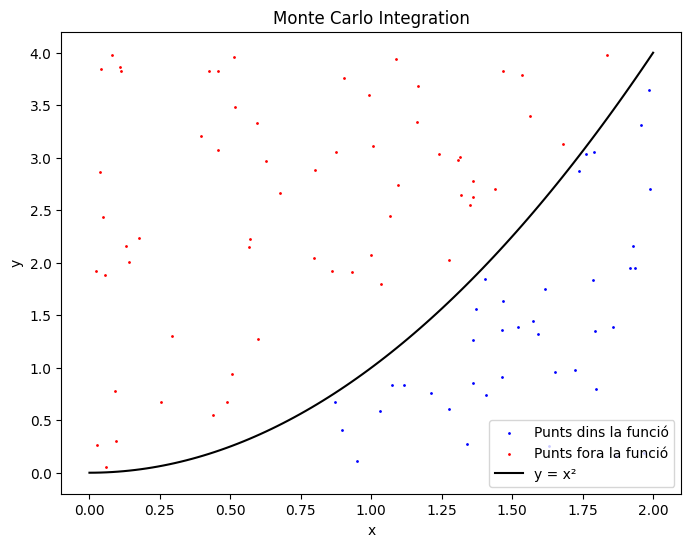

In [227]:
# Resultats
print("\nMonte Carlo estimated integral:", area_function)
print("Analytical integral:", integral_analytic)

# Representació gràfica
plt.figure(figsize=(8,6))
plt.scatter(xf, yf, s=1, color='blue', label="Punts dins la funció")
plt.scatter(xn, yn, s=1, color='red', label="Punts fora la funció")
x_vals = np.linspace(a, b, 100)
y_vals = x_vals**2
plt.plot(x_vals, y_vals, color='black', label="y = x²")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Monte Carlo Integration")
plt.show()